In [58]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import datasets

svc = svm.SVC(gamma=100., C=100.,kernel='linear')
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [59]:
svc

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100.0, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
X=digits.data
Y=digits.target

In [61]:
k_list=[0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05]
accuracy_point_list=[]
y_predict_set=[]
Y_test_set=[]
for k in k_list:
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=k)
    svc.fit(X_train,Y_train)
    y_predict=svc.predict(X_test)
    accuracy_point=svc.score(X_test,Y_test)
    Y_test_set.append(Y_test)
    y_predict_set.append(y_predict)
    accuracy_point_list.append(accuracy_point)

In [62]:
index_of_least_accuracy = accuracy_point_list.index(min(accuracy_point_list))
y_predict_worst=y_predict_set[index_of_least_accuracy]
Y_test_worst=Y_test_set[index_of_least_accuracy]

In [63]:
min(accuracy_point_list)

0.9666254635352287

In [64]:
accuracy_point_list

[0.9777530589543938,
 0.9666254635352287,
 0.9763560500695411,
 0.9809220985691574,
 0.9703703703703703,
 0.9777777777777777,
 0.9777777777777777,
 0.9814814814814815,
 0.9888888888888889,
 0.9777777777777777]

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_worst,y_predict_worst)
cm

array([[84,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 82,  0,  0,  0,  0,  1,  0,  2,  0],
       [ 0,  0, 78,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 80,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 83,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 78,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0, 77,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 77,  2,  1],
       [ 0,  4,  0,  1,  0,  2,  0,  0, 71,  1],
       [ 0,  0,  0,  2,  0,  2,  0,  0,  2, 72]], dtype=int64)

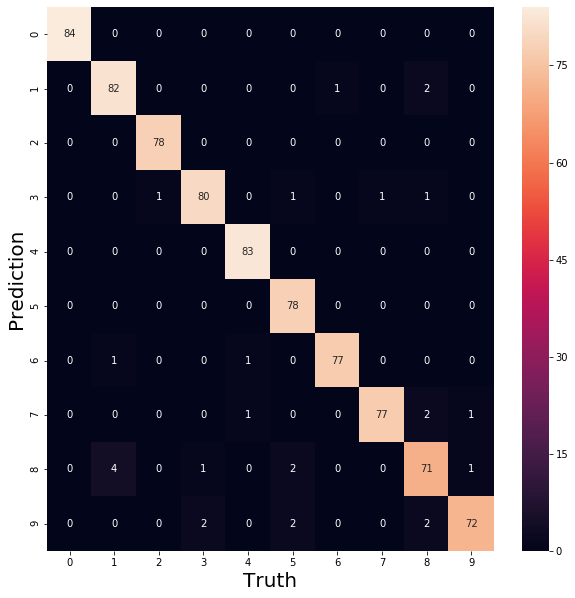

In [66]:
import seaborn as sn
import matplotlib.pylab as pyt
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax=sn.heatmap(cm,annot=True,xticklabels=True,cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Truth',size=20)
plt.ylabel('Prediction',size=20)

pyt.savefig('foo1.png')

plt.show()

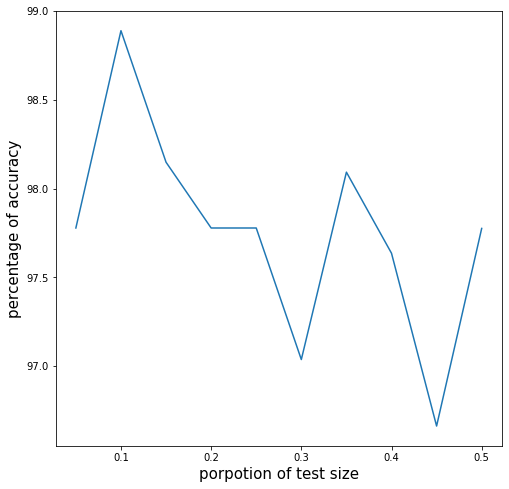

In [67]:
import numpy as np
k_list=np.asarray(k_list)
accuracy_point_list=np.asarray(accuracy_point_list)
plt.figure(figsize=(8,8))
plt.plot(k_list,accuracy_point_list*100)
plt.xlabel('porpotion of test size',size =15)
plt.ylabel('percentage of accuracy',size=15)
pyt.savefig('foo2.png')
plt.show()